# K A L L Y S T O

__About the Document__: _In its original form this document is a Jupyter Notebook (`README.ipynb`), but for convenience it has been automatically converted into the more traditional `README.md`. If you are reading this version then bear in mind that code and output snippets below reflect the contents of Jupyter code/output cells._

## Easy Python Exports

Kallysto is designed to streamline the generation of Python data science publications (papers, articles, presentations, etc.) by making it easy to export data (numbers, text, results, figures, dataframes, etc.) from a notebook (or script), for future import into a target publication.

Kallysto is designed with Latex publications in mind, and offers a special form of frictionless importing for Latex, but its basic export and logging features can be beneficial in a broader context too, especially when it is necessary to generate a definitive set of _result assets_. As an added benefit, Kallysto also maintains a detailed export audit trail thereby helping users to verify the provence of results over time.

## How it Works
To do this, Kallysto provides for three distinct export types (_figures_, _tables_, and _values_), using the file system as a data store for the exports and their associated meta-data.

### With Added Latex Superpowers
In the special case, where publications are produced using Latex, Kallysto can automatically generate Latex command defintions for each export. These defintions can be _included_ directly in the Latex source so that exports can be referenced by name, and making it easy to keep publications up-to-date with the latest results. 

Even if Latex is not used, Kallysto helps to streamline the publication process by exporting results directly from notebooks, without th eneed for users to manually cut and paste the data they need for their a publication.

### Scriptable Data Science
In this way, Kallysto bridges an existing gap in the ability to fully script data science workflows. While it has always been possible to script some elements of a data science workflow (data capture, cleaning, analysis, visualisation), by and large, generating a publication or report has typically relied on manual interventions (e.g. extracting results from a notebook and inserting them in a publication). However, Kallysto achieves this in code and as such the export/import process can now be added to a scripted workflow, using a whatever scripting approach (Shell, Make, Python, Papermill, etc.) and/or pipelinig framework (Airflow, Luigi, etc.) is preferred. This greatly improves the repeatability, replicability, and reproducibility of data-driven research projects.

## Usage
The following is a summary of how to get started with Kallysto. It is best viewed as a Jupyter notebook but has been converted to markdown for convenience. It shows one example of each type of export, describes how they are stored in th eKallysto data store, and explains how they can be incoprorated into a Latex publication.

In what follows when we talk about a `Publication` we are referring to specific Latex (in this example) publication project –– a report, article, or presentation, for example. Kallysto assumes that project will have a name or `title` and it further assumes that the files for this project will be stored in a directory of the same name. 

As we shall explain, when exports are generated Kallysto will use this publication directory as the root of a file-based data store for the data and meta-data associated with these exports.

### Getting Started
To get started with Kallysto we must link a given notebook with the publication project. We do this by creating a new `Publication(...)` instance in our notebook, with arguments that include: 

1. a _notebook_ name; 
2. the _title_ of the publication;  
3. the relative path from the notebook to the publication root, _pub_root_.

For example, in the code below, we create a new `Publication(...)` instance in the target notebook (_this notebook_ if you are reading the Jupyter notebook rather than the corresponding markdown file) and link it to a publication project called `a_report` stored in the same directory as the notebook.

In [1]:
import pandas as pd
from matplotlib.pylab import plt

# The important Kallysto imports.
from kallysto.publication import Publication
from kallysto.export import Export

In [2]:
# Create a link between this notebook and the target publication (a_report)
report = Publication(
    notebook='README.ipynb',  # Current notebook name
    title='a_report',         # Publication name
    pub_root='demo/',         # Location of publication project.
    overwrite=True, 
    fresh_start=True
)

Kallysto generates its data store, as per the directory tree shown below, with a set of subdirectories  to store data (`data/`) and figure (`figs/)` exports, and their Latex defintiions (`defs/`). 

Notice how there are subdirectories named after the exporting notebook (this notebook or `README.ipynb`) inside the various Kallysto subdirectories. This makes it easy  for exports from different notebooks, but to the same publication, to co-exist in the data store.

Kallysto also creates a `logs/` subdirectory, which holds a master log of all exports (`kallysto.log`) for the publication. And, in this example, there is a pre-existing `tex/` directory with the user's Latex content.

In [3]:
# The current directory tree (with main Kallysto directories/files)
!tree demo

demo
├── a_report
│   ├── data
│   │   └── README.ipynb
│   ├── defs
│   │   └── README.ipynb
│   │       └── _definitions.tex
│   ├── figs
│   │   └── README.ipynb
│   ├── logs
│   │   └── kallysto.log
│   └── tex
│       ├── a_report.pdf
│       ├── a_report.png
│       ├── a_report.tex
│       └── kallysto.tex
└── sales_data.csv

9 directories, 7 files


### Exporting from a Notebook
Kallysto currently supports three types of exports, _tables_, _figures, and _values_,. Generating an export is a matter of calling the appropriate export command and sending the resulting expoert to the right publication.

#### Exporting a Table
The example code below reads in a dataset of sales data and then create a dataframe that aggregates sales totals by sales rep. 

In [4]:
# Load in sample data.
sales = pd.read_csv('demo/sales_data.csv')
sales.head()

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total
0,43106,East,Jones,Pencil,95,1.99,189.05
1,43123,Central,Kivell,Binder,50,19.99,999.50
2,43140,Central,Jardine,Pencil,36,4.99,179.64
3,43157,Central,Gill,Pen,27,19.99,539.73
4,43174,West,Sorvino,Pencil,56,2.99,167.44


In [5]:
# Total sales by representative
sales_by_rep = sales.groupby('Rep')[['Total']].sum()
sales_by_rep

,Total
Rep,
Andrews,149.25
Gill,539.73
Howard,57.71
Jardine,628.74
Jones,1202.50
Kivell,999.50
Morgan,449.10
Parent,1619.19
Sorvino,167.44


In the code below, Kallysto exports this dataframe using `Export.table`, providing the dataframe as input, alongwith a Latex defintion name (`SalesByRepTable`), and a caption for the Latex table.

Note that the `Export.table(...)` command generates an export object, but the actual export –– the transfer of the data to the Kallysto data store –– only happens via the `> report`. One advantage of this is that it means we can store the export objects in a variable and transfer them to different publications from a single notebook.

The export generates a CSV file from the dataframe and saves it for future reference in `a_report/data/README.ipynb/SalesByReo.csv`; see the directory tree below.

The Kallysto log (`a_report/logs/kallysto.log`) records the export with a unique id including a reference to the saved CSV. 

In [6]:
# Create a table export and send to export.
Export.table('SalesByRepTable', 
             data=sales_by_rep,
             caption='Sales totals by sales representative (\$US).'
) > report

# View updated data store
!tree demo

demo
├── a_report
│   ├── data
│   │   └── README.ipynb
│   │       └── SalesByRepTable.csv
│   ├── defs
│   │   └── README.ipynb
│   │       └── _definitions.tex
│   ├── figs
│   │   └── README.ipynb
│   ├── logs
│   │   └── kallysto.log
│   └── tex
│       ├── a_report.pdf
│       ├── a_report.png
│       ├── a_report.tex
│       └── kallysto.tex
└── sales_data.csv

9 directories, 8 files


Kallysto also adds a Latex table defintion (shown below) to the definitions file for the notebook (`a_report/defs/README.ipynb/_definitions.tex`), labeling defintion with the export name so that it can be referenced as `\ref{SalesByRepTable}` in the main Latex file. 

Notice too how the Latex defintion includes the export id as part of its meta-data –– and links to the source notebook and the saved CSV –– which is the same id used by the Kallysto log, making it easy to track the provence of the export.

In [7]:
# The resulting Latex table defintion code.
!tail -n 36 demo/a_report/defs/README.ipynb/_definitions.tex 

% Uid: 1542995308.065123
% Created: 17:48:28 11/23/18 GMT
% Exported: 17:48:28 11/23/18 GMT
% Title: a_report
% Notebook: ../../../README.ipynb
% Data file: ../data/README.ipynb/SalesByRepTable.csv
\providecommand{\SalesByRepTable}{
dummy}
\renewcommand{\SalesByRepTable}{
    \begin{table}[h]
        \centering
        \begin{tabular}{lr}
			\toprule
			{} &    Total \\
			Rep      &          \\
			\midrule
			Andrews  &   149.25 \\
			Gill     &   539.73 \\
			Howard   &    57.71 \\
			Jardine  &   628.74 \\
			Jones    &  1202.50 \\
			Kivell   &   999.50 \\
			Morgan   &   449.10 \\
			Parent   &  1619.19 \\
			Sorvino  &   167.44 \\
			Thompson &    63.68 \\
			\bottomrule
			\end{tabular}

        \caption{Sales totals by sales representative (\$US).}
        \label{SalesByRepTable}
    \end{table}
}




#### Exporting a Figure
Figure exports are similar. The code snippet below generates a simple barplot (not shown) for the sales total table, and the figure export command exports the image (accessible via  `fig`) and the underlying dataframe. Once again the `Export.figure(...)` command generates an export object which is transferred to the publication via the `> report`.

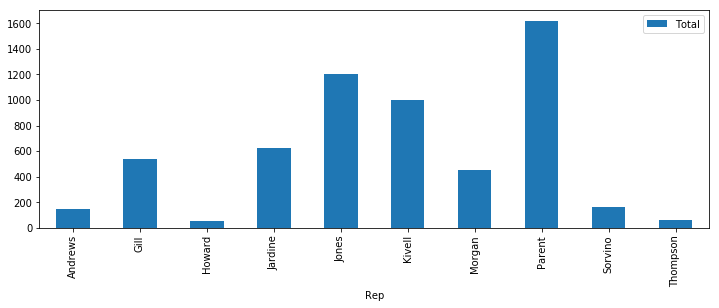

In [8]:
# An example barchart and figure export.
fig, ax = plt.subplots(figsize=(12, 4))

sales_by_rep.plot(kind='bar', ax=ax)

Export.figure(
    'SalesByRepBarChart',  # Export name
    image=fig,             # The plot to be exported
    data=sales_by_rep,     # The data used to produce the plot.
    caption='Sales totals by sales representative (\$US).'
) > report;

The image is stored in `a_report/figs/README.ipynb/` and the dataframe is stored in `a_report/data/README.ipynb/`, as shown below.

In [9]:
# The updated data store
!tree demo

demo
├── a_report
│   ├── data
│   │   └── README.ipynb
│   │       ├── SalesByRepBarChart.csv
│   │       └── SalesByRepTable.csv
│   ├── defs
│   │   └── README.ipynb
│   │       └── _definitions.tex
│   ├── figs
│   │   └── README.ipynb
│   │       └── SalesByRepBarChart.pdf
│   ├── logs
│   │   └── kallysto.log
│   └── tex
│       ├── a_report.pdf
│       ├── a_report.png
│       ├── a_report.tex
│       └── kallysto.tex
└── sales_data.csv

9 directories, 10 files


In [10]:
# The newly added Latex figure defintion code.
!tail -n 20 demo/a_report/defs/README.ipynb/_definitions.tex 


% Uid: 1542995308.419949
% Created: 17:48:28 11/23/18 GMT
% Exported: 17:48:28 11/23/18 GMT
% Title: a_report
% Notebook: ../../../README.ipynb
% Image file: ../figs/README.ipynb/SalesByRepBarChart.pdf
% Data file: ../data/README.ipynb/SalesByRepBarChart.csv
\providecommand{\SalesByRepBarChart}{
dummy}
\renewcommand{\SalesByRepBarChart}{
    \begin{figure}
        \center
        \includegraphics[width=1\textwidth]{../figs/README.ipynb/SalesByRepBarChart.pdf}
        \caption{Sales totals by sales representative (\$US).}
        \label{SalesByRepBarChart}
    \end{figure}
}




#### Exporting a Value
It is also possible to export simple values, such as numbers or strings. This is especially useful when referring to a specific aspectsof a result, perhaps the coordinates of a particular plot point or the mean of a set of values. By exporting a value we can refer to this aspect of the result by the value's export name in our Latex file, thereby minimising the manual changes that may need to be made as the analysis evolves.

For example, the code below exports the sum of the sales data from the earlier table as `TotalSales`. Value exports are always exported as strings, thereby accommodating the export of any data-type that can be usefully rendered as a string. This makes value expoerts very flexible and powerful.

In [11]:
# Exporting the sales total.
Export.value('TotalSales', sales_by_rep['Total'].sum()) > report

Value('TotalSales', 5876.84)

The Latex definition (from `a_report/defs/README.ipynb/_definitions.tex`) for the figure is shown below, and as before includes meta-data as comments to help link the definition to the log.

In [12]:
# The updated Latex defintion code for the value export.
!tail -n 12 demo/a_report/defs/README.ipynb/_definitions.tex


% Uid: 1542995309.047931
% Created: 17:48:29 11/23/18 GMT
% Exported: 17:48:29 11/23/18 GMT
% Title: a_report
% Notebook: README.ipynb
\providecommand{\TotalSales}{
dummy}
\renewcommand{\TotalSales}{
5876.84}




### Importing into Latex
Now that we have generated our expoerts we need to import them into a Latex document where they can be displayed, referenced, and discussed as needed.

#### Latex Command Definitions
The Latex language allows for user-defined commands and this is how Kallysto incorporates exports into Latex documents. Effectively, each export generates a new command defintion named after the export. A value export generates a command that simply returns the value. A table export generates a command that returns a Latex table defintion. And a figure export generates a command that returns a Latex fingure definition. These commands are all stored in the defintions files as mentioned above.

A minor point worth noting is that each command is actually a pair of commands (`\providecommand{}{}` followed by a `renewcommand{}{}`) which makes it possible to Kallysto to overwrite commands of the same name, withou tthe overhead of managing duplicate command definitions; this is one of those Latex hacks that are best forgotten about as it does not have any bearing on Kallysto usage.

#### Latex `\input`
To get import these defintions into Latex we can use the Latex `\input{...}` command, with the location of the defintions file as its argument. If we generate exports from multiple notebooks, then this will mean there are multiple defintions files to import. 

To make things easier, Kallysto maintains a special file called `kallysto.tex`, which is automatically populated with the inputs for all of the definitions files associated with a publication. Then, including these defintions in a Latex document means improting this single `kallysto.tex` file.

In [13]:
# A minimal Latex document
!cat demo/a_report/tex/a_report.tex

\documentclass[10pt]{article} 

\usepackage{booktabs}  % Needed for tables.
\usepackage{graphicx}  % Needed for figures.

\title{A Report}

\date{}

\begin{document}

\maketitle 

\input{kallysto.tex}   % Include Kallysto defs.

% The text below makes reference to the three 
% exports made from the sample notebook.

Table \ref{SalesByRepTable} summarises the sales totals by sales rep and the same data is also shown in Figure \ref{SalesByRepBarChart}, for an overall sales total of \TotalSales. Notice how the table and figure references in this paragraph are also dynamically created using references to the appropriate export names.

\SalesByRepTable

\SalesByRepBarChart

\end{document}


The code above shows a minimal Latex document generated using the exports generated above. The exoprt definitions are incorporated by the command, `\input{kallysto.tex}` as shown, which provides access to the table, figure, and value exports via their names (`SalesByRepTable`, `SalesByRepBarChart`, and `TotalSales` respectively. The compiled document is presened below, showing the rendered table and figure, and the value reference within the text.

### Generating the Publication
In this way, by including a single defintions file, which Kallysto produces, into the main Latex document, an author can gain immediate access to all of the exports that have been generated by Kallysto, potentially from multiple different notebooks, reflecting different parts of analysis.

And, just for completeness we can programmatically generate the resulting latex publication as follows:

In [14]:
# Compile the Latex doc
!latexmk -pdf -pdflatex="pdflatex -interaction=batchmode" -f -cd -use-make demo/a_report/tex/a_report.tex && latexmk -c -cd demo/a_report/tex/a_report.tex 

Latexmk: This is Latexmk, John Collins, 22 April 2016, version: 4.45.
Latexmk: Changing directory to 'demo/a_report/tex/'
Latexmk: applying rule 'pdflatex'...
Rule 'pdflatex': Rules & subrules not known to be previously run:
   pdflatex
Rule 'pdflatex': The following rules & subrules became out-of-date:
      'pdflatex'
------------
Run number 1 of rule 'pdflatex'
------------
------------
Running 'pdflatex -interaction=batchmode  -recorder  "a_report.tex"'
------------
This is pdfTeX, Version 3.14159265-2.6-1.40.17 (TeX Live 2016) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
Latexmk: References changed.
Latexmk: Log file says output to 'a_report.pdf'
Latexmk: List of undefined refs and citations:
  Reference `SalesByRepBarChart' on page 1 undefined on input line 19
  Reference `SalesByRepTable' on page 1 undefined on input line 19
Latexmk: Summary of warnings:
  Latex failed to resolve 2 reference(s)
Latexmk: applying rule 'pdflatex'...
Rule 'pdflat

In [15]:
# Convert resulting pdf to png because its easier to display in Jupyter.
!sips -s format png demo/a_report/tex/a_report.pdf --out demo/a_report/tex/a_report.png

/Users/barrysmyth/Dropbox/Documents@MBA2/Code/Python/kallysto/demo/a_report/tex/a_report.pdf
  /Users/barrysmyth/Dropbox/Documents@MBA2/Code/Python/kallysto/demo/a_report/tex/a_report.png


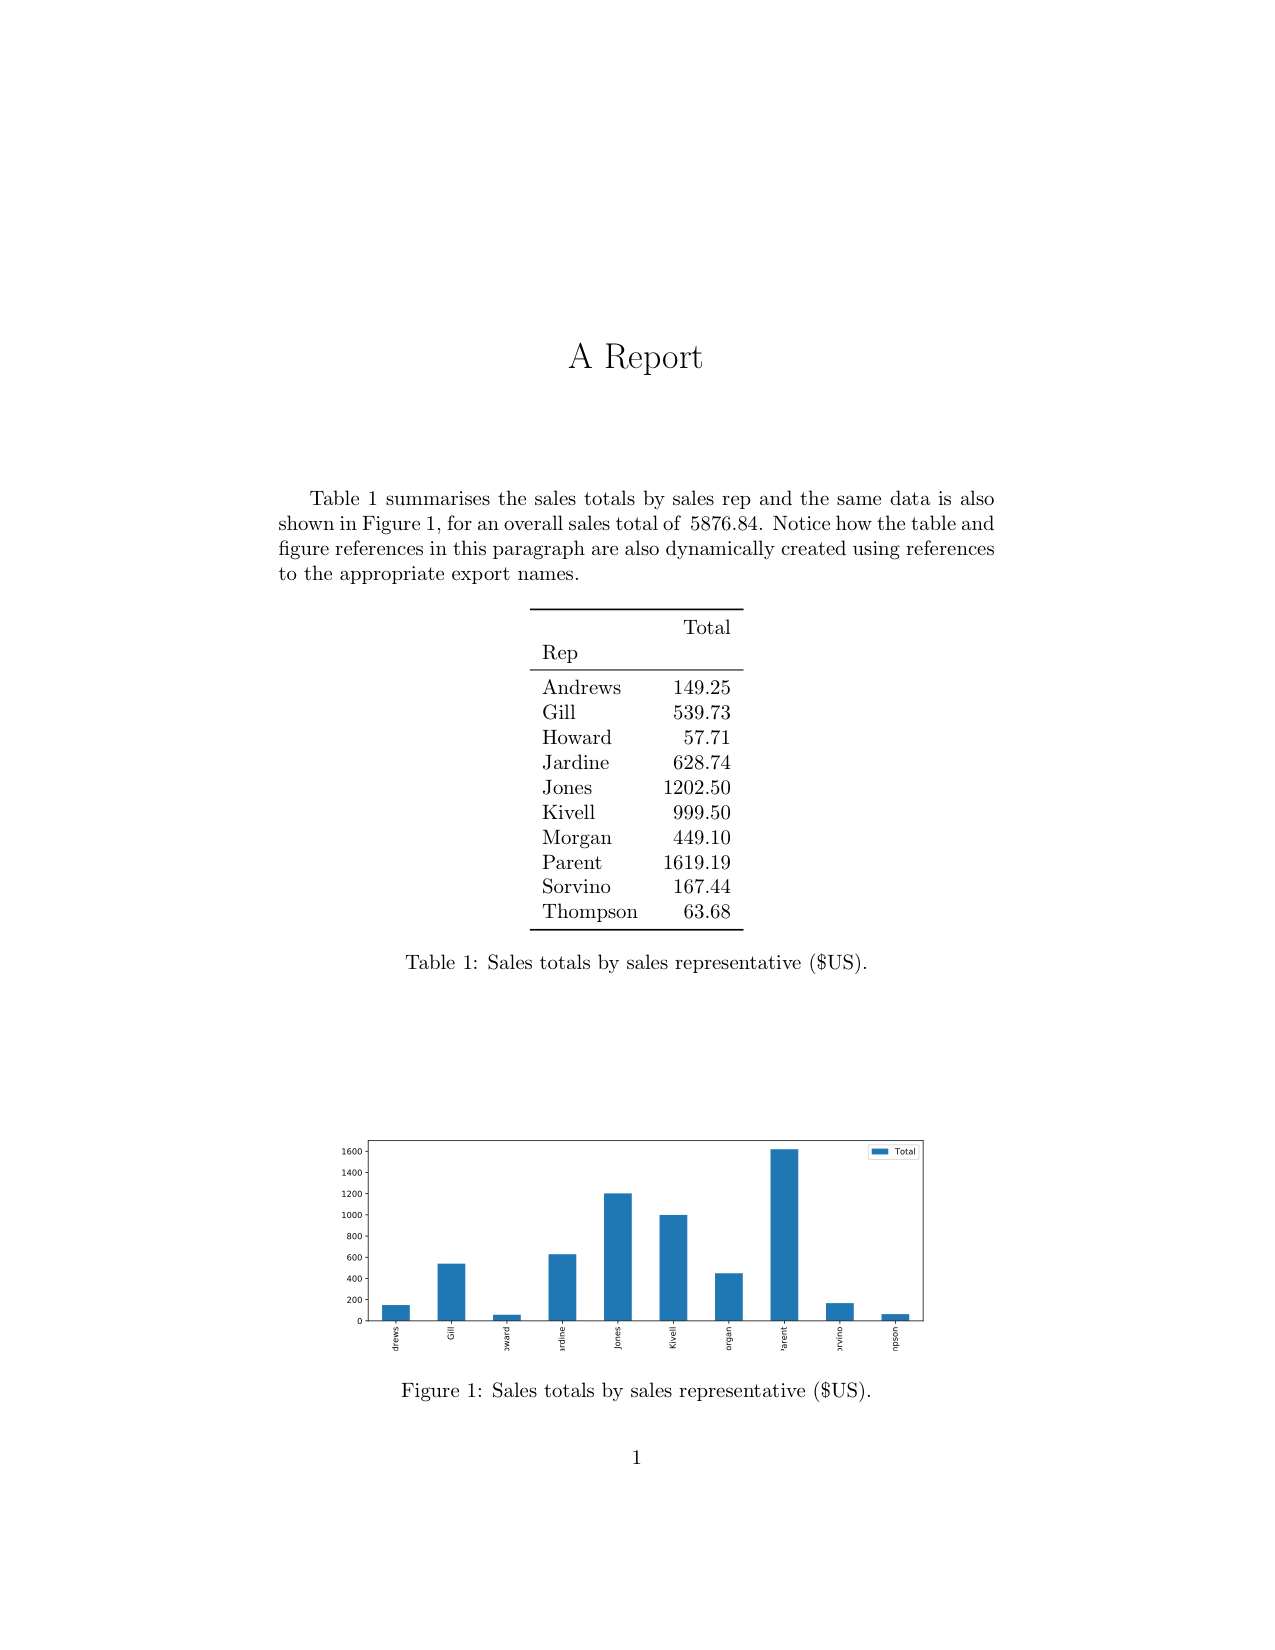

In [16]:
from IPython.display import Image
Image(filename=('demo/a_report/tex/a_report.png'))

### Some time later; just because we can ...

If a some stage in the future the analysis changes –– for example we need to change the currency and convert the values –– then we can simply re-run the notebook to re-export the new data and regenerate the publication.

Value('TotalSales', 7346.05)

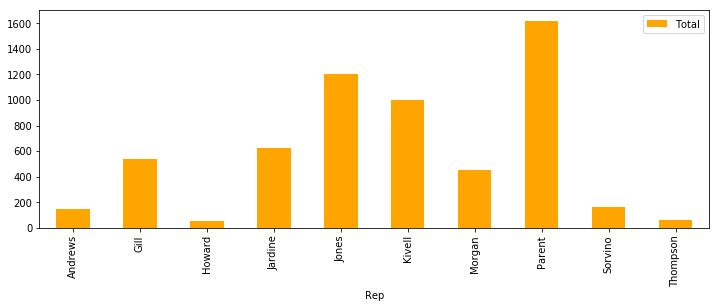

In [17]:
# Re-export the new data and results.
Export.table('SalesByRepTable', 
             data=sales_by_rep['Total'].apply(
                 lambda v: round(v*1.25, 2)),  # round to 2 decimal places after conversion.
             caption='Sales totals by sales representative (\$AUS).'
) > report

fig, ax = plt.subplots(figsize=(12, 4))

sales_by_rep.plot(kind='bar', color='orange', ax=ax)

Export.figure(
    'SalesByRepBarChart',  # Export name
    image=fig,             # The plot to be exported
    data=sales_by_rep,     # The data used to produce the plot.
    caption='Sales totals by sales representative (\$AUS).'
) > report

Export.value('TotalSales', sales_by_rep['Total'].sum()*1.25) > report

### Et Voila!

Latexmk: This is Latexmk, John Collins, 22 April 2016, version: 4.45.
Latexmk: Changing directory to 'demo/a_report/tex/'
Latexmk: applying rule 'pdflatex'...
Rule 'pdflatex': Rules & subrules not known to be previously run:
   pdflatex
Rule 'pdflatex': The following rules & subrules became out-of-date:
      'pdflatex'
------------
Run number 1 of rule 'pdflatex'
------------
------------
Running 'pdflatex -interaction=batchmode  -recorder  "a_report.tex"'
------------
This is pdfTeX, Version 3.14159265-2.6-1.40.17 (TeX Live 2016) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
Latexmk: References changed.
Latexmk: Log file says output to 'a_report.pdf'
Latexmk: List of undefined refs and citations:
  Reference `SalesByRepBarChart' on page 1 undefined on input line 19
  Reference `SalesByRepTable' on page 1 undefined on input line 19
Latexmk: Summary of warnings:
  Latex failed to resolve 2 reference(s)
Latexmk: applying rule 'pdflatex'...
Rule 'pdflat

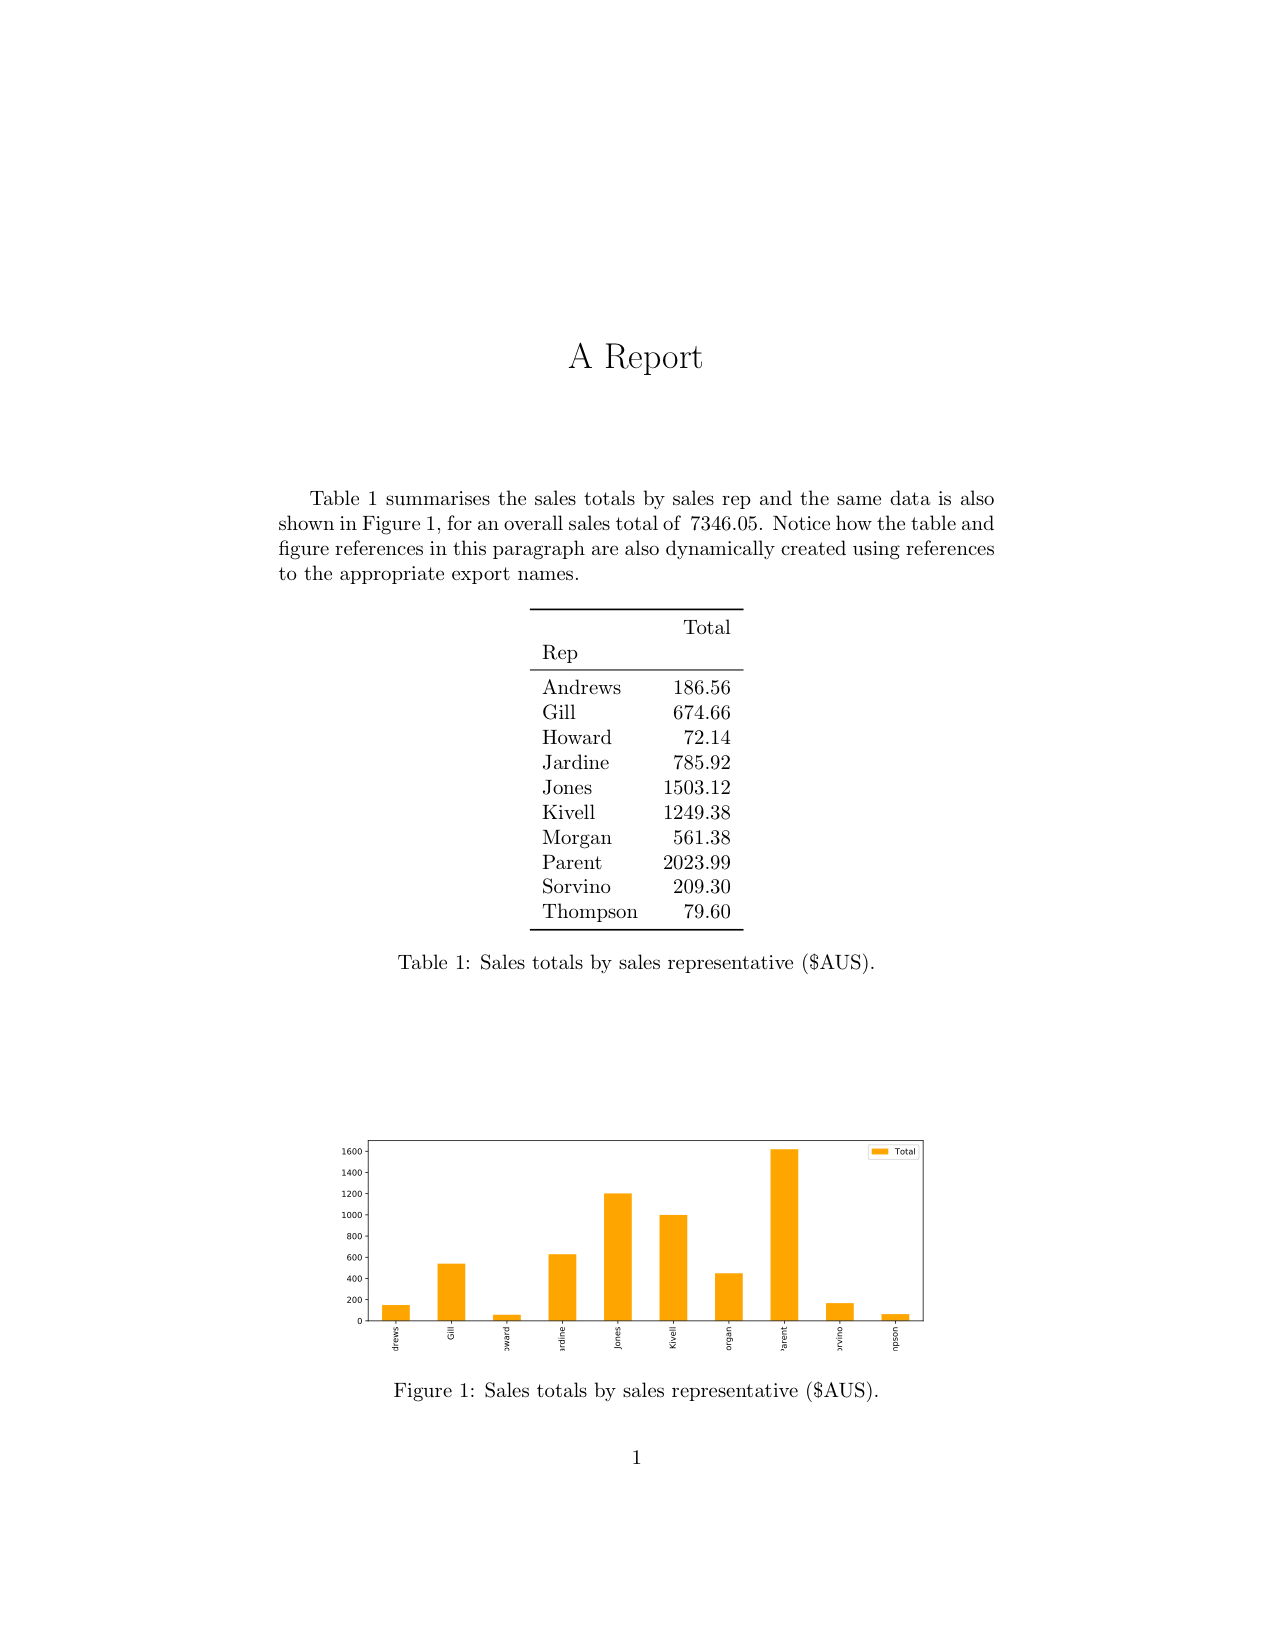

In [18]:
# Recompile .tex, convert pdf to png, display png.
!latexmk -pdf -pdflatex="pdflatex -interaction=batchmode" -f -cd -use-make demo/a_report/tex/a_report.tex && latexmk -c -cd demo/a_report/tex/a_report.tex 
!sips -s format png demo/a_report/tex/a_report.pdf --out demo/a_report/tex/a_report.png
Image(filename=('demo/a_report/tex/a_report.png'))

## Create README.md
We automatically produce the repo README file from this notebook.

In [19]:
# Convert this notebook to markdown so that there is an uptodate README.md for GitHub.
!jupyter nbconvert --to markdown README.ipynb

[NbConvertApp] Converting notebook README.ipynb to markdown
[NbConvertApp] Support files will be in README_files/
[NbConvertApp] Making directory README_files
[NbConvertApp] Making directory README_files
[NbConvertApp] Making directory README_files
[NbConvertApp] Making directory README_files
[NbConvertApp] Writing 26473 bytes to README.md
